# Brain Lesion Data Exploration

This notebook provides initial exploration of the brain lesion dataset, including:
- Dataset overview and summary statistics
- Sample lesion visualizations
- Clinical score distributions
- Treatment group comparisons

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path
import sys
import warnings
# warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

from visualization import BrainLesionVisualizer, visualize_random_lesions
from analysis_dashboard import BrainLesionAnalyzer

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')

%matplotlib inline

/home/bradl/miniconda3/envs/Halothon/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Load Data

In [2]:
# Initialize visualizer
data_root = Path('../data')
visualizer = BrainLesionVisualizer(data_root)
analyzer = BrainLesionAnalyzer(visualizer)

# Load tasks data
tasks_df = visualizer.tasks_df

print(f"Dataset loaded successfully!")
print(f"Total patients: {len(tasks_df)}")
print(f"Data shape: {tasks_df.shape}")

Dataset loaded successfully!
Total patients: 4119
Data shape: (4119, 4)


## Dataset Overview

In [3]:
# Basic statistics
print("Dataset Summary:")
print(f"Total patients: {len(tasks_df)}")
print(f"Patients with deficits (Clinical score > 0): {len(tasks_df[tasks_df['Clinical score'] > 0])}")
print(f"Treatment patients: {len(tasks_df[tasks_df['Treatment assignment'] == 'Treatment'])}")
print(f"Control patients: {len(tasks_df[tasks_df['Treatment assignment'] == 'Control'])}")
print(f"Patients with no treatment assignment: {len(tasks_df[tasks_df['Treatment assignment'] == 'N/A'])}")

# Display first few rows
print("\nFirst 10 rows:")
tasks_df.head(10)

Dataset Summary:
Total patients: 4119
Patients with deficits (Clinical score > 0): 1744
Treatment patients: 902
Control patients: 842
Patients with no treatment assignment: 0

First 10 rows:


,lesion_id,Clinical score,Treatment assignment,Outcome score
0,lesion0804.nii.gz,0.0,NaN,NaN
1,lesion0904.nii.gz,0.0,NaN,NaN
2,lesion3948.nii.gz,12.0,Control,12.0
3,lesion0611.nii.gz,3.0,Treatment,3.0
4,lesion1326.nii.gz,0.0,NaN,NaN
5,lesion1477.nii.gz,0.0,NaN,NaN
6,lesion0140.nii.gz,0.0,NaN,NaN
7,lesion1191.nii.gz,1.0,Treatment,1.0
8,lesion2999.nii.gz,4.0,Treatment,1.0
9,lesion0711.nii.gz,0.0,NaN,NaN


In [4]:
# Data types and missing values
print("Data Info:")
tasks_df.info()

print("\nMissing values:")
print(tasks_df.isnull().sum())

print("\nDescriptive statistics:")
tasks_df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lesion_id             4119 non-null   object 
 1   Clinical score        4119 non-null   float64
 2   Treatment assignment  1744 non-null   object 
 3   Outcome score         1744 non-null   float64
dtypes: float64(2), object(2)
memory usage: 128.8+ KB

Missing values:
lesion_id                  0
Clinical score             0
Treatment assignment    2375
Outcome score           2375
dtype: int64

Descriptive statistics:


,Clinical score,Outcome score
count,4119.000000,1744.000000
mean,4.124302,9.491972
std,10.208491,13.944565
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,3.000000
75%,2.500000,11.000000
max,100.000000,100.000000


## Clinical Score Analysis

In [5]:
# Clinical score distribution
fig = visualizer.plot_clinical_score_distribution()
fig.show()

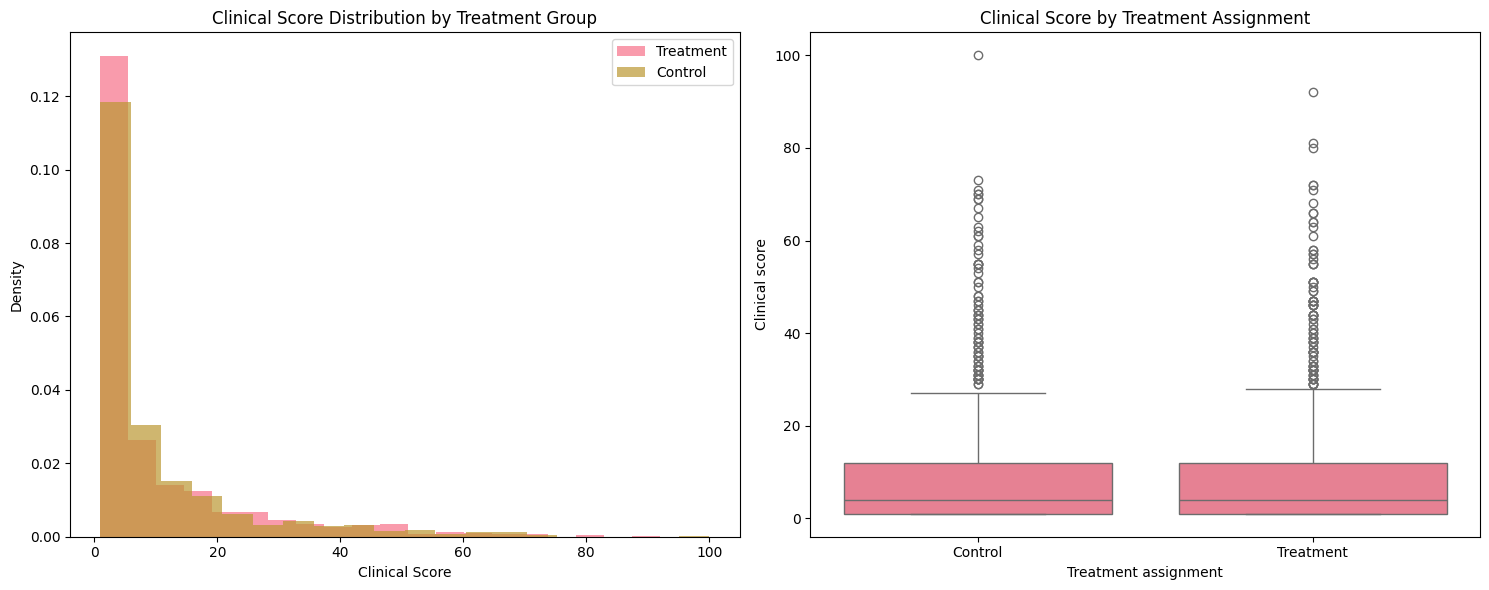

In [6]:
# Clinical score by treatment group
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
treatment_scores = tasks_df[tasks_df['Treatment assignment'] == 'Treatment']['Clinical score']
control_scores = tasks_df[tasks_df['Treatment assignment'] == 'Control']['Clinical score']

axes[0].hist(treatment_scores, bins=20, alpha=0.7, label='Treatment', density=True)
axes[0].hist(control_scores, bins=20, alpha=0.7, label='Control', density=True)
axes[0].set_xlabel('Clinical Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Clinical Score Distribution by Treatment Group')
axes[0].legend()

# Box plot
treatment_data = tasks_df[tasks_df['Treatment assignment'].isin(['Treatment', 'Control'])]
sns.boxplot(data=treatment_data, x='Treatment assignment', y='Clinical score', ax=axes[1])
axes[1].set_title('Clinical Score by Treatment Assignment')

plt.tight_layout()
plt.show()

## Sample Lesion Visualizations

Sample lesions with deficits:


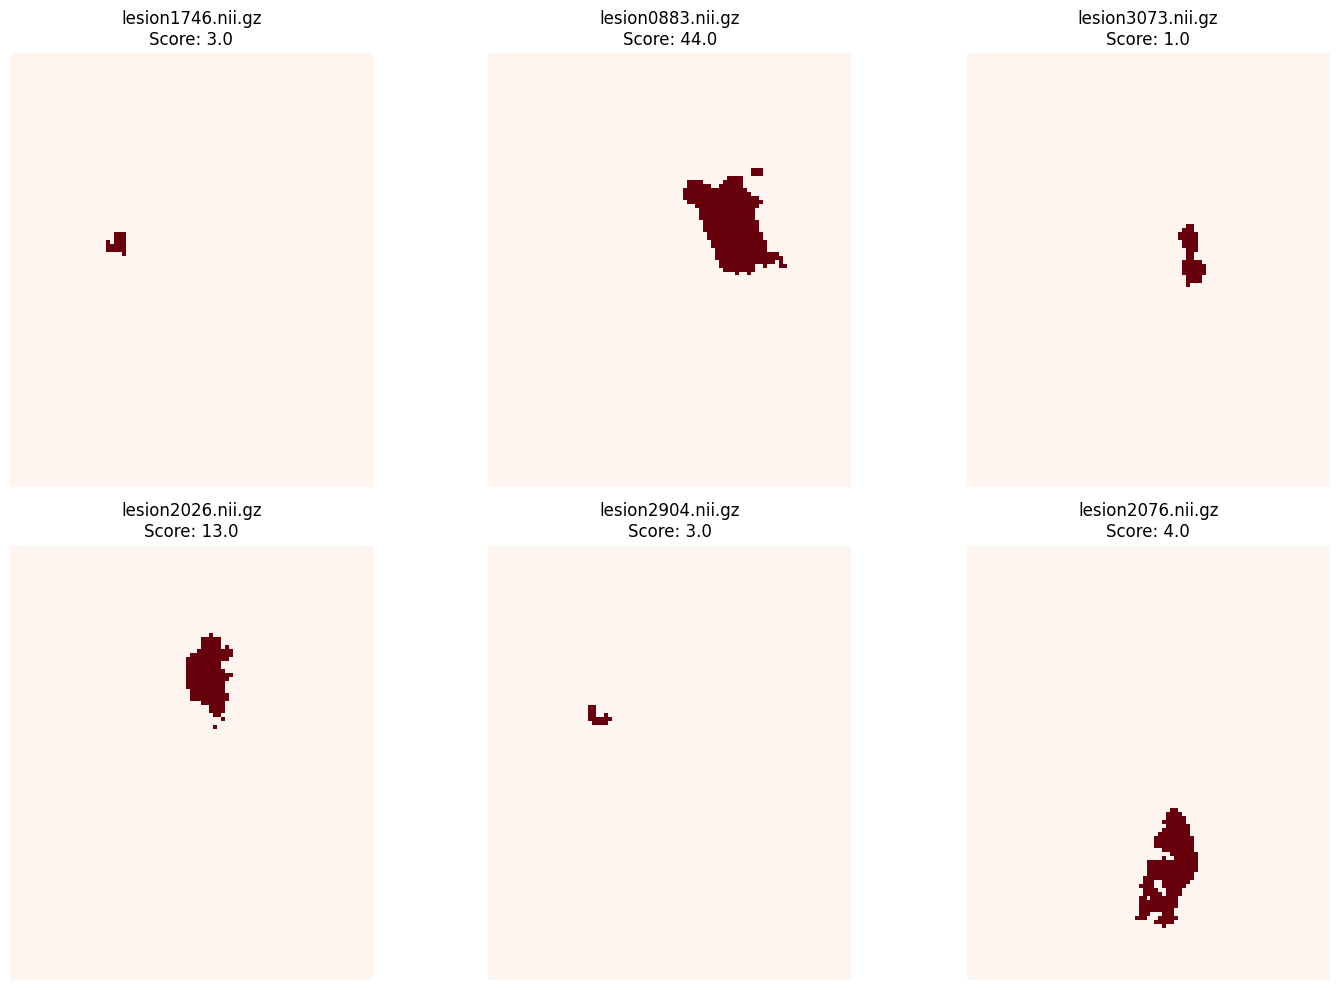

In [7]:
# Visualize random sample of lesions with deficits
print("Sample lesions with deficits:")
fig = visualize_random_lesions(visualizer, n_samples=6)
plt.show()

Exploring lesion: lesion2366.nii.gz


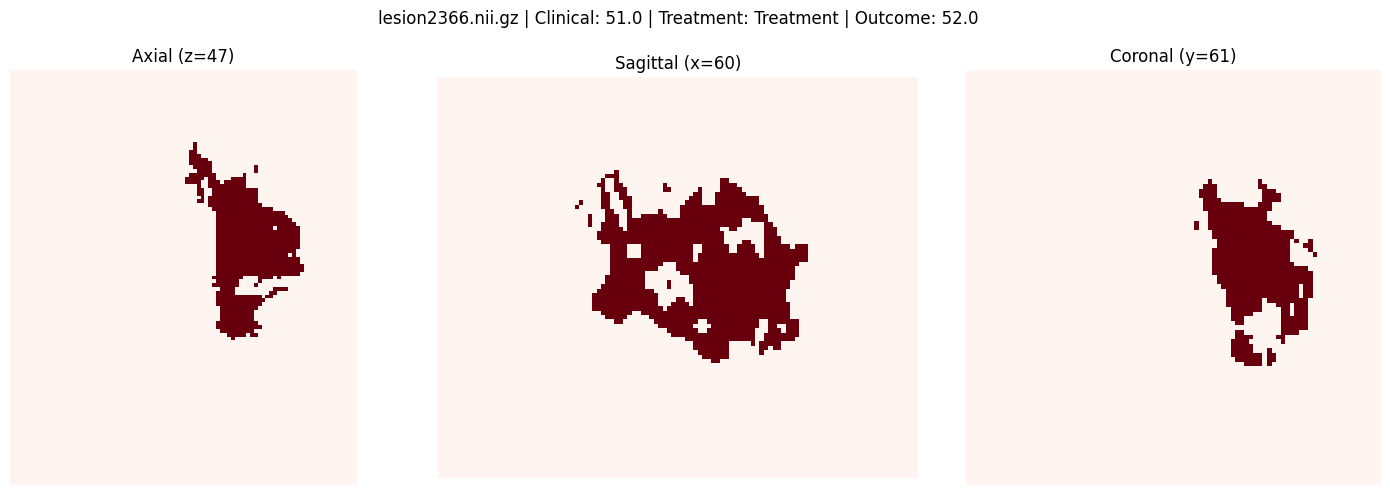

Lesion volume: 17869 voxels


In [8]:
# Individual lesion exploration
# Select a lesion with high clinical score
high_score_lesions = tasks_df[tasks_df['Clinical score'] > 50]
if len(high_score_lesions) > 0:
    sample_lesion = high_score_lesions.iloc[0]['lesion_id']
    print(f"Exploring lesion: {sample_lesion}")
    
    # 2D slices
    fig_slices = visualizer.plot_lesion_slices(sample_lesion)
    plt.show()
    
    # 3D visualization
    fig_3d = visualizer.plot_3d_lesion(sample_lesion)
    fig_3d.show()
    
    # Volume calculation
    volume = visualizer.calculate_lesion_volume(sample_lesion)
    print(f"Lesion volume: {volume} voxels")
else:
    print("No lesions with clinical score > 50 found")

## Treatment Outcome Analysis

In [9]:
# Treatment outcome analysis
fig = visualizer.plot_treatment_outcome_analysis()
fig.show()

In [10]:
# Calculate improvement scores
treatment_data = tasks_df[
    (tasks_df['Treatment assignment'].isin(['Treatment', 'Control'])) &
    (tasks_df['Outcome score'].notna())
].copy()

treatment_data['Improvement'] = treatment_data['Clinical score'] - treatment_data['Outcome score']

# Summary statistics by group
improvement_summary = treatment_data.groupby('Treatment assignment')['Improvement'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print("Improvement Summary by Treatment Group:")
print(improvement_summary)

# Response rates (improvement > 0)
response_rates = treatment_data.groupby('Treatment assignment').apply(
    lambda x: (x['Improvement'] > 0).mean()
).round(3)

print("\nResponse Rates (% with improvement > 0):")
print(response_rates)

Improvement Summary by Treatment Group:
                      count  mean   std   min   max
Treatment assignment                               
Control                 842 -0.00  1.54 -12.0  11.0
Treatment               902  0.48  2.03 -14.0  16.0

Response Rates (% with improvement > 0):
Treatment assignment
Control      0.164
Treatment    0.333
dtype: float64


## Volume Analysis

In [11]:
# This cell may take some time to run as it calculates volumes for all lesions
print("Calculating lesion volumes... This may take a few minutes.")

try:
    # Calculate volumes (this may take time)
    volume_df = visualizer.get_lesion_volumes_summary()
    
    print(f"Volume calculation completed for {len(volume_df)} lesions.")
    
    # Volume statistics
    print("\nVolume Statistics:")
    print(volume_df['volume'].describe())
    
    # Volume vs clinical score
    fig = visualizer.plot_volume_vs_clinical_score()
    fig.show()
    
    # Correlation
    correlation = volume_df['volume'].corr(volume_df['Clinical score'])
    print(f"\nCorrelation between volume and clinical score: {correlation:.3f}")
    
except Exception as e:
    print(f"Error in volume analysis: {e}")
    print("You may need to check the data paths or reduce the sample size for initial exploration.")

Calculating lesion volumes... This may take a few minutes.
Calculating lesion volumes...
Volume calculation completed for 4119 lesions.

Volume Statistics:
count     4119.000000
mean      1460.026220
std       3186.360508
min          4.000000
25%         81.500000
50%        298.000000
75%       1344.000000
max      42343.000000
Name: volume, dtype: float64
Calculating lesion volumes...



Correlation between volume and clinical score: 0.827


## Population Heatmap Preview

In [12]:
# Generate population heatmap (this may take time)
print("Generating population heatmap... This may take several minutes.")

try:
    # Start with a smaller subset for faster processing
    fig = visualizer.create_population_heatmap()
    fig.show()
    
except Exception as e:
    print(f"Error generating population heatmap: {e}")
    print("This operation requires significant computational resources and time.")
    print("Consider running this analysis on a subset of data or using the Streamlit app.")

Generating population heatmap... This may take several minutes.
Processing 4119 lesions for population heatmap...
Processed 500 lesions...
Processed 1000 lesions...
Processed 1500 lesions...
Processed 2000 lesions...
Processed 2500 lesions...
Processed 3000 lesions...
Processed 3500 lesions...
Processed 4000 lesions...


## Summary and Next Steps

This notebook provided an initial exploration of the brain lesion dataset. Key findings:

1. **Dataset Size**: The dataset contains 4,119 patients with brain lesions
2. **Clinical Scores**: Range from 0-100, with 1,744 patients having non-zero scores
3. **Treatment Groups**: 902 treatment patients and 842 control patients
4. **Lesion Characteristics**: Binary lesion maps in 91x109x91 MNI space

**Next Steps**:
1. Run detailed treatment efficacy analysis (notebook 02)
2. Explore lesion clustering and pattern analysis
3. Use the interactive Streamlit app for deeper exploration
4. Implement machine learning models for the three tasks

**To run the Streamlit app**:
```bash
streamlit run ../src/app.py
```

In [13]:
# Save key findings
findings = {
    'total_patients': len(tasks_df),
    'patients_with_deficits': len(tasks_df[tasks_df['Clinical score'] > 0]),
    'treatment_patients': len(tasks_df[tasks_df['Treatment assignment'] == 'Treatment']),
    'control_patients': len(tasks_df[tasks_df['Treatment assignment'] == 'Control']),
    'mean_clinical_score': tasks_df['Clinical score'].mean(),
    'std_clinical_score': tasks_df['Clinical score'].std()
}

print("Key Dataset Findings:")
for key, value in findings.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Key Dataset Findings:
total_patients: 4119
patients_with_deficits: 1744
treatment_patients: 902
control_patients: 842
mean_clinical_score: 4.12
std_clinical_score: 10.21
